# WeatherPy

-------------------------------------------------------------------------
-------------------------------------------------------------------------



In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn.preprocessing import PolynomialFeatures as pf


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

weather_api_key = ''

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

652

In [10]:
# Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key  
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    city_url = url + "&q=" + city
    print(city_url)
    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather['coord']['lat']
        city_mtemp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_cloudiness = city_weather['clouds']['all']
        city_wspeed = city_weather['wind']['speed']
        city_data.append({"city":city,
                      "Longitude":city_long,
                      "Latitude":city_lat,
                      "Max Temp":city_mtemp,
                      "Humidity":city_humidity,
                      "Cloudiness":city_cloudiness,
                      "Wind Speed":city_wspeed,
                      })
    except:
        print("city not found")
        pass

# Indicate that Data Loading is complete 
print("Data Retrieval Complete  ")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c2f7da63cd2b420b710c61d2873b1b4&q=norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c2f7da63cd2b420b710c61d2873b1b4&q=mys shmidta
city not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c2f7da63cd2b420b710c61d2873b1b4&q=alamogordo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c2f7da63cd2b420b710c61d2873b1b4&q=karpathos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c2f7da63cd2b420b710c61d2873b1b4&q=nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c2f7da63cd2b420b710c61d2873b1b4&q=ahuimanu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c2f7da63cd2b420b710c61d2873b1b4&q=angoram
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c2f7da63cd2b420b710c61d2873b1b4&q=preobrazheniye
http://api.o

Convert Raw Data to DataFrame

Export the city data into a .csv.
Display the DataFrame


In [12]:
df = pd.DataFrame(city_data)
df.head()

,city,Latitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,norman wells,65.28,39.20,55,20,11.41
1,alamogordo,32.90,82.99,23,1,5.82
2,karpathos,35.51,69.80,77,0,2.24
3,nikolskoye,59.70,35.60,92,90,4.47
4,ahuimanu,21.44,84.99,62,1,6.93


***Plotting the Data***

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

***Latitude vs. Temperature Plot***

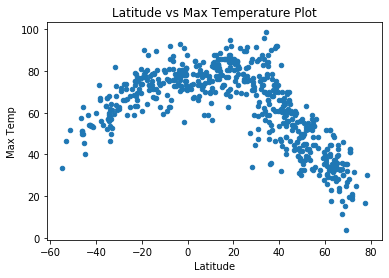

In [19]:
#scatter plot
df.plot(x = 'Latitude',y = 'Max Temp',
             kind ='scatter',title="Latitude vs Max Temperature Plot")
# save chart
plt.savefig("Latitude_vs_Temperature_Plot.png")

# as we move toward the equator, temperature increases. as we move from the 
# equator away, toward north pole, temperature decreases.

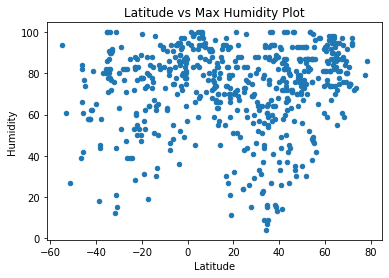

In [21]:
#scatter plot
df.plot(x = 'Latitude',y = 'Humidity',
             kind ='scatter',title="Latitude vs Max Humidity Plot")
# save chart
plt.savefig("Latitude_vs_Humidity.png")

#no relation between latitude and humidity

 ***Latitude vs. Cloudiness Plot***

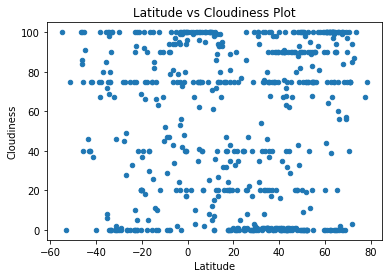

In [22]:
#scatter plot
df.plot(x = 'Latitude',y = 'Cloudiness',
             kind ='scatter',title="Latitude vs Cloudiness Plot")
# save chart
plt.savefig("Latitude_vs_Cloudiness.png")

#no relation between latitude and humidity

***Latitude vs. Wind Speed Plot***

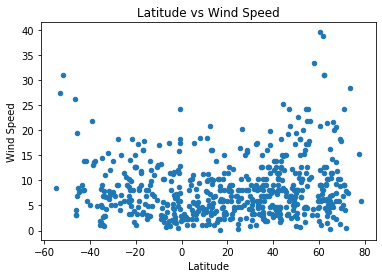

In [24]:
#scatter plot
df.plot(x = 'Latitude',y = 'Wind Speed',
             kind ='scatter',title="Latitude vs Wind Speed")
# save chart
plt.savefig("Latitude_vs_Wind Speed.png")

#no relation between latitude and humidity

***Linear Regression***

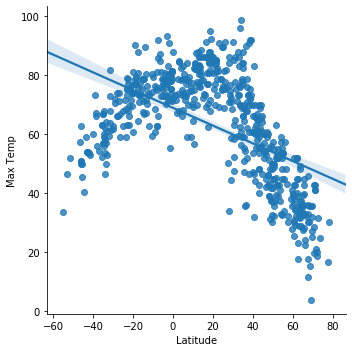

In [28]:
# OPTIONAL: Create a function to create Linear Regression plots
import seaborn as sns
sns.lmplot(x = 'Latitude',y = 'Max Temp',data=df,fit_reg=True) 
